Welcome to the Physics Demo! Here we'll be exploring how coding and simulation can be used in tandem with physics. In this demo, let's look at projectiles, and the code we can use to simulate and visualise them. 

---

## 🚀 Projectiles and Cannon Simulation


Projectiles are something you will be familiar with from A-level. Using SUVAT equations, it's fairly simple to model and plot them in python just from the initial velocity $u$ and angle $\theta$.

$u_{x} = u\cos(\theta)$

$u_{y} = u\sin(\theta)$

$x = u_{x}t$ 

$y = u_{y}t - \frac{1}{2}gt^{2}$. 

Where $t$ is time, $g=9.81$ is acceleration due to gravity, and $x$ and $y$ are the horizontal and vertical displacements respectively. We can implement this into a python function really simply. For simplicity, all of the functions defined for this demo are in a separated file called 'newtons_cannon.py'. If you're interested in what is in that file, then feel free to take a peak! Below we call on a function which requires an input of initial velocity and angle of launch, and the plots the resultant projectile. To run all cells in this notebook, simply click the fast forward looking button on the top task bar. This will restart and run all of the cells. If you wish to run a single cell, the simply select in and input 'Shift + Enter'. 

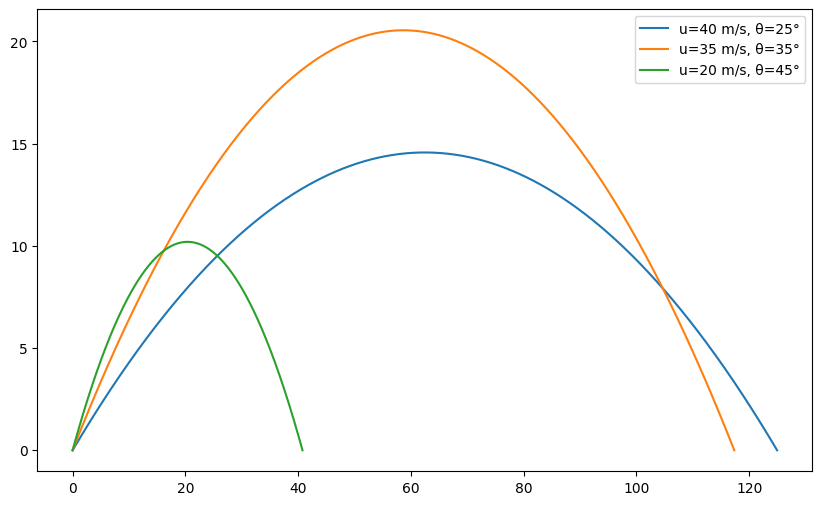

In [1]:
from newtons_cannon import simple_projectile # import our function from python file
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6)) # set-up empty graph
 
# Calling on the function multiple times for multiple plots with different initial parameters. 
simple_projectile(u=40, deg=25, ax=ax) 
simple_projectile(u=35, deg=35, ax=ax)
simple_projectile(u=20, deg=45, ax=ax)

ax.legend() # produces key
plt.show() # show final graph

---


## ☄️ Newton's Cannon 


Let's extend this concept to consider the curvature of the Earth, and maybe even launching our projectile into space. Let's explore the concept of 'Newton's Cannon', which posits that a cannon on a mountain can shoot a cannonball around the Earth at a certain velocity.  

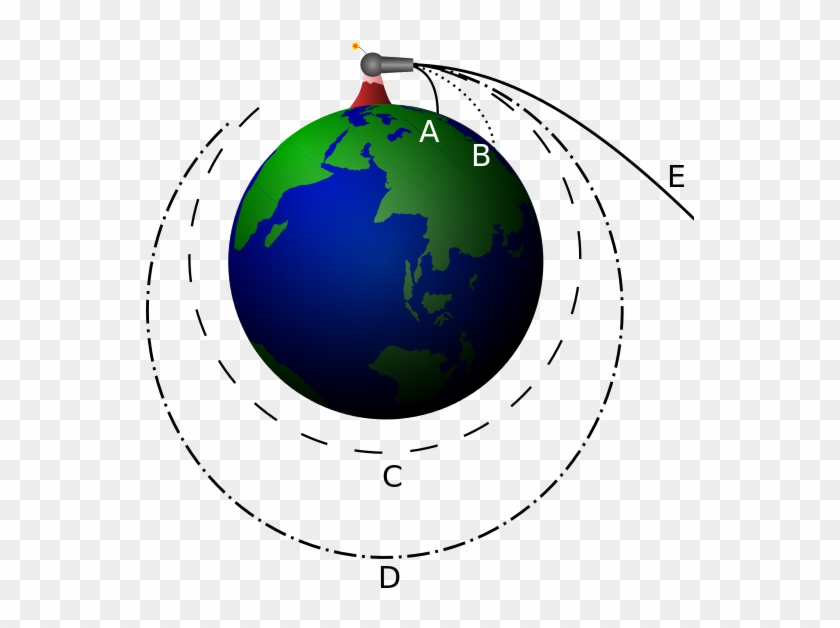

**A** and **B** - The initial velocity is insufficient to stably orbit the Earth $v < v_{orb}$. 

**C** - The initial velocity is exactly the minimum orbital velocity required to orbit the Earth $v = v_{orb}$.

**D** - The initial velocity is greater than the minimum orbital velocity required to orbit the Earth, but less that the escape velocity, forming an elongated orbit $v_{orb} < v < v_{esc}$. 

**E** -The initial velocity is greater than, or equal to, the escape velocity, meaning that it has sufficient energy to escape Earth's orbit $ v_{esc} \leq v$.  

By the end of this demo, we should be able to simulate this! We can also introduce the concept of drag: a phenomenon missing in Newton's original concept. 




---

### Escape Velocity 

It may be useful for us to calculate the minimum speed needed for the projectile to escape Earth's gravity, known as *escape velocity*. 

$ v_{esc} = \sqrt{\frac{2GM}{r}}$, 

where $G$ is Newton's Gravitational Constant, $M$ is the mass of the central body (in this case Earth), and $r$ is the distance between the two bodies. 



### Orbital Velocity 

For the orbital velocity, or the velocity required to keep an object in orbit, Gravitational Force = Centripetal Force. Therefore:

$v_{c} = \sqrt{\frac{GM}{r}}$

Below, I've called on some functions from newtons_cannon.py which, with a given altitude above the Earth's surface, calculates the orbital and escape velocity of a projectile. 

In [2]:
from newtons_cannon import orbital_velocity, escape_velocity # import relevant functions


altitude = 0 # set altitude
vorb = orbital_velocity(altitude) # store orbital velocity in variable


print(f'The orbital velocity of an object at altitude {altitude} is {vorb:.0f} m/s')



vesc = escape_velocity(altitude) # store escape velocity in variable


print(f'The escape velocity of an object at altitude {altitude} is {vesc:.0f} m/s')

The orbital velocity of an object at altitude 0 is 7910 m/s
The escape velocity of an object at altitude 0 is 11186 m/s


**Question (1): in the above cell, run the functions at different altitudes. Is there anything you notice about the relationship between the two speeds?**

---

In [3]:
import numpy as np
import matplotlib.image as mpimg

R_E = 6371000   
earth_img = mpimg.imread('earth.png')  # Local image file of the Earth

## 🍎 Newton's Law of Gravitation:

First we'll need to consider a more realistic approach to downwards acceleration rather than simply $g$. The force between the Earth and our projectile can be calculated using Newton's Law of Gravitation. 

$ \vec{F} = -\frac{GMm}{r^{2}}\hat{r}$

where:

$G$ is Newton's Gravitational Constant, 

$M$ is the mass of the Earth, 

$m$ is the mass of the projectile, 

$r$ is the distance from Earth's centre. 


### Equations of motion:

From this we can derive the following equations of motion. 

$ \frac{d\vec{r}}{dt} = \vec{v},  \frac{d\vec{v}}{dt} = -\frac{GM}{r^{3}}\vec{r}$

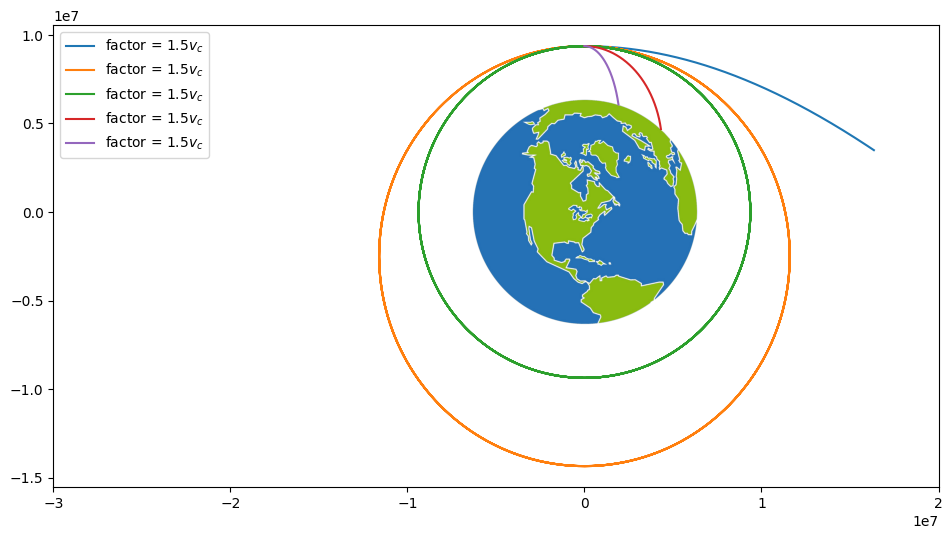

In [4]:
from newtons_cannon import newtons_cannon  # import relevant functions

fig, ax = plt.subplots(figsize=(12,6)) # set up figure

ax.imshow(earth_img, extent=[-R_E, R_E, -R_E, R_E]) # draw the earth from png

# newtons_cannon(orbital velocity, angle of inclination, altitude in km, ax, time of simulation in seconds, label)

newtons_cannon(factor=1.5, deg=0, h=3000, ax=ax, t_max=2000, label=f'factor = 1.5$v_c$')
newtons_cannon(factor=1.1, deg=0, h=3000, ax=ax, t_max=50000, label=f'factor = 1.5$v_c$')
newtons_cannon(factor=1, deg=0, h=3000, ax=ax, t_max=50000, label=f'factor = 1.5$v_c$')
newtons_cannon(factor=0.6, deg=0, h=3000, ax=ax, t_max=50000, label=f'factor = 1.5$v_c$')
newtons_cannon(factor=0.3, deg=0, h=3000, ax=ax, t_max=50000, label=f'factor = 1.5$v_c$')

ax.set_xlim(-3e7, 2e7) # set axis range
ax.legend(loc='upper left') # place key in top left of figure

---

## 💨 Air resistance

In A-level, you will be used to the phrase 'assume no air resistance', but let's instead assume! The equation we can use to model the drag force felt on the projectile is:

$\vec{F}_{drag} = -\frac{1}{2}C_{d}\rho Av\vec{v}$, 

where $C_{d}$ is the drag coefficient (depends on the shape of the object), $\rho$ is the fluid density, and $A$ is the cross-sectional area of the projectile. Note the minus sign meaning the force opposes the motion of the object. The acceleration due to drag is therefore. 

$\vec{a}_{drag} = \frac{\vec{F}_{drag}}{m}$

We can fairly simply implement this equation into python, and plot our results. If you're curious about what that function looks like, then check out the attached python file newtons_cannon.py.


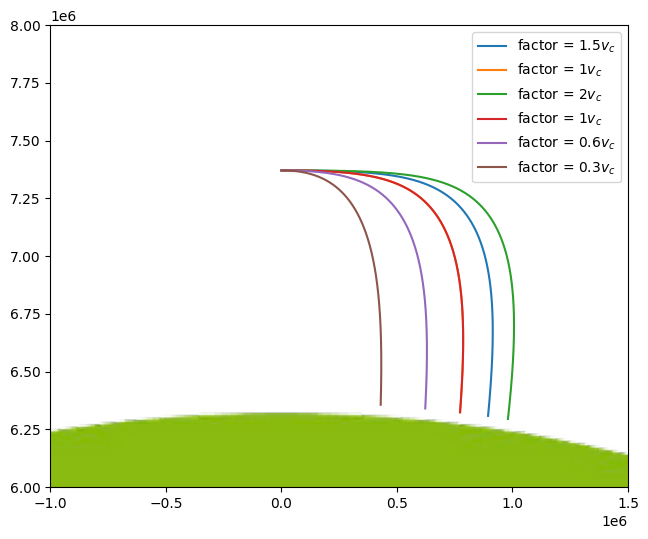

In [5]:
from newtons_cannon import newtons_cannon_drag

fig, ax = plt.subplots(figsize=(12,6))

ax.imshow(earth_img, extent=[-R_E, R_E, -R_E, R_E]) # draw the earth from png

for i in [1.5, 1,2, 1, 0.6, 0.3]:
    newtons_cannon_drag(factor=i, deg=0, h=1000, ax=ax, t_max=100000, label=f'factor = {i}$v_c$')


ax.set_xlim(-1e6, 1.5e6) # set axis range
ax.set_ylim(6e6, 8e6) 

ax.legend() # place key in top left of figure


We can see here a drastically different picture 1000km in the sky. In that case, how can satellites orbit the earth if drag just causes them to fall? In the above model, we've assumed that the density of the atmosphere is homogenous. That is, its the same for all altitudes. However, we know that not to be the case: the air gets thinner the higher our altitude. We can use this equation to model this relationship: 

$\rho = \rho_{0}e^{\frac{h}{H}}$

where $\rho_{0}$ is the air density at sea level, $h$ is the altitude above sea level, and $H$ is the scale height.  


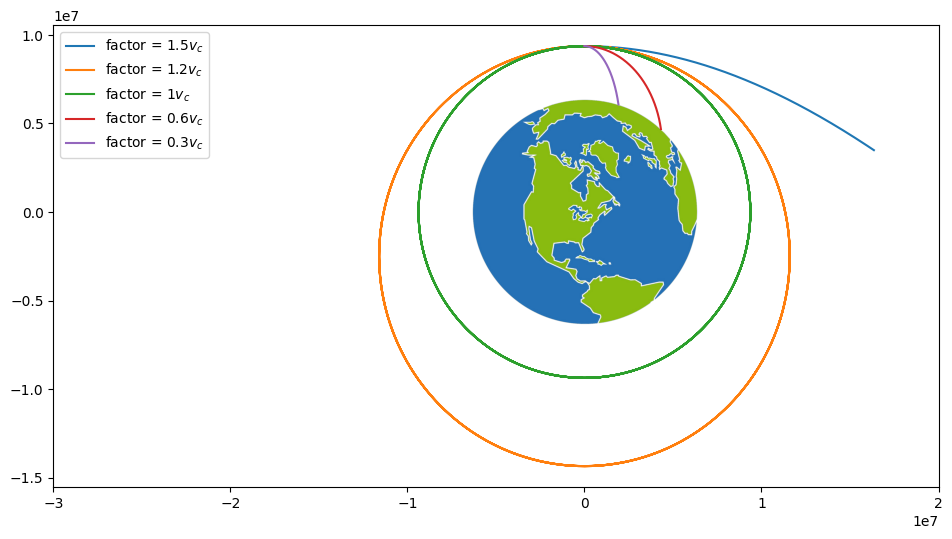

In [7]:
from newtons_cannon import newtons_cannon_drag_atmo

fig, ax = plt.subplots(figsize=(12,6))  # set up figure

ax.imshow(earth_img, extent=[-R_E, R_E, -R_E, R_E]) # draw the earth from png
                    
newtons_cannon_drag_atmo(1.5, 0, 3000, ax, 2000, label=f'factor = 1.5$v_c$')
newtons_cannon_drag_atmo(1.1, 0, 3000, ax, 50000, label=f'factor = 1.2$v_c$')
newtons_cannon_drag_atmo(1, 0, 3000, ax, 50000, label=f'factor = 1$v_c$')
newtons_cannon_drag_atmo(0.6, 0, 3000, ax, 50000, label=f'factor = 0.6$v_c$')
newtons_cannon_drag_atmo(0.3, 0, 3000, ax, 50000, label=f'factor = 0.3$v_c$')

ax.set_xlim(-3e7, 2e7)
ax.legend(loc = 'upper left')


This looks almost identical to our original plot, simply because our altitude is so high. If, however, we were to launch our cannon from the ground, we will notice a difference in projectile between each model:

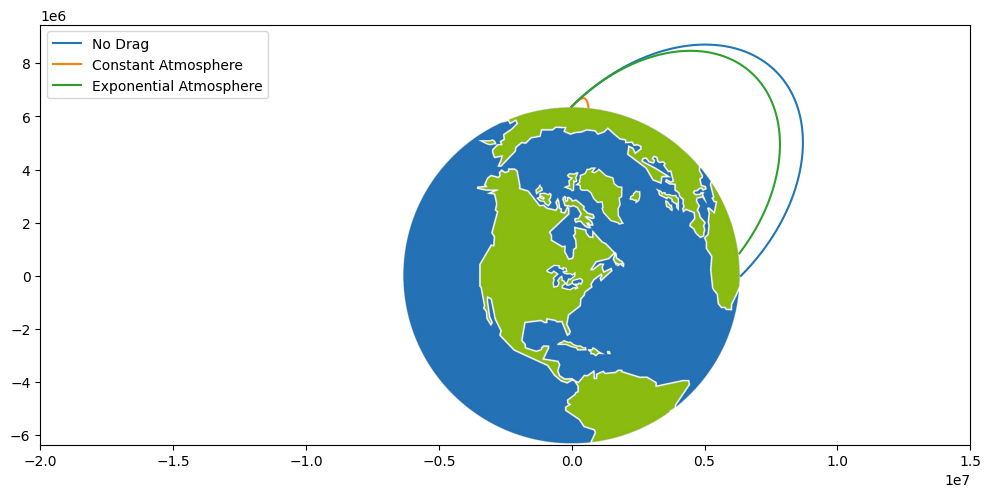

In [8]:
fig, ax = plt.subplots(figsize=(12,6))  # set up figure

ax.imshow(earth_img, extent=[-R_E, R_E, -R_E, R_E]) # draw the earth from png

# Trajectories
newtons_cannon(1, 45, 0, ax, 100000, label='No Drag') 
newtons_cannon_drag(1, 45, 0, ax, 100000, label='Constant Atmosphere', mass=1000) 
newtons_cannon_drag_atmo(1, 45, 0, ax, 100000, label='Exponential Atmosphere', mass=1000) 

ax.set_xlim(-2e7, 1.5e7) # set axis range
ax.legend(loc='upper left')

Here we can see a noticeable difference in each model, and how the exponential atmosphere model is the most true to reality. **Question (2): In the cell above, try changing the angle of launch or initial velocity, and see how that changes the plot produced.**

--- 

## Extension: 🧮 Ratios

If we want the projectlie in our function to escape its orbit, we need to put in the escape velocity in terms of the orbital velocity, i.e.:

$\frac{v_{esc}}{v_{orb}} = \frac{\sqrt{\frac{2GM}{r}}}{\sqrt{\frac{GM}{2}}}$

which simplifies down to:
 
$\frac{v_{esc}}{v_{orb}} = \sqrt{2}$


This means that the escape velocity is always $\sqrt{2}$ times greater that the orbital velocity at the same altitude.

**Question (3): confirm in the cell below that the ratio between the two values is independent of the altitude.**

In [ ]:

def escape_velocity_factor(h):
    
    return escape_velocity(h)/orbital_velocity(h)


### YOUR CODE HERE ###
altitude = 0

v_esc = escape_velocity_factor(altitude)
print(f"Ratio of escape velocity to orbital velocity at {altitude} m: {v_esc:.2f}")


Ratio of escape velocity to orbital velocity at 0 m: 1.41


**Question (4): Play around with these functions: how does each variable change the plots? What comparisons can you make? Can you get each type of projectile to escape the Earth's gravitational field?**

/var/folders/dy/1fbk51z16s119n9v728_bp5w0000gn/T/ipykernel_49614/3194077075.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left') # place key in top left of figure


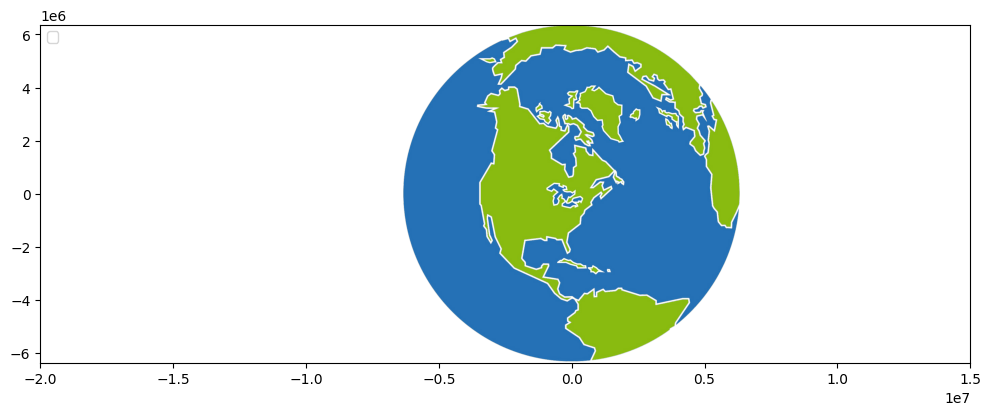

In [9]:
fig, ax = plt.subplots(figsize=(12,5))  # set up figure

ax.imshow(earth_img, extent=[-R_E, R_E, -R_E, R_E]) # draw the earth from png

### YOUR CODE HERE ###


ax.set_xlim(-2e7, 1.5e7) # set axis range
ax.legend(loc='upper left') # place key in top left of figure

---